In [7]:
import os
import cv2
import numpy as np
import albumentations as A
from random import choice
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

# augmenting

In [10]:
images_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/images'
labels_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/labels'
augmented_image_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/images'
augmented_label_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/labels'

# Create the augmented image and label directories if they don't exist
Path(augmented_image_dir).mkdir(parents=True, exist_ok=True)
Path(augmented_label_dir).mkdir(parents=True, exist_ok=True)

# Augmentation pipeline
augmentations = [
    A.Rotate(limit=30, p=1.0),         
    A.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, p=1.0),  # Translate by a random percentage
    A.RandomScale(scale_limit=0.5, p=1.0),  # Scale by a random factor between 0.5 and 1.5
    A.ElasticTransform(alpha=3.5, sigma=1.0, p=1.0),  # Elastic transformation with sigma >= 1
    A.HorizontalFlip(p=1.0),  # Horizontal flip
    A.VerticalFlip(p=1.0)     # Vertical flip
]

# Helper function to apply random augmentation to both image and label
def augment_image_and_label(image_path, label_path):
    image = cv2.imread(image_path)
    
    if image is None:
        return  # Skip if the image cannot be loaded

    # Load label data (assuming labels are stored as 'x' and 'y' arrays)
    label = np.load(label_path)
    x = label['x']
    y = label['y']

    # Define augmentation
    transform = choice(augmentations)
    augmented = transform(image=image)
    augmented_image = augmented['image']

    # Apply the same augmentation to the labels (adjust coordinates)
    augmented_label = {
        'x': x,  # Apply transformation to x coordinates (example placeholder)
        'y': y   # Apply transformation to y coordinates (example placeholder)
    }

    # Save augmented image and label
    augmented_image_path = os.path.join(augmented_image_dir, Path(image_path).name)
    cv2.imwrite(augmented_image_path, augmented_image)

    # Save the corresponding label (use only .npz extension)
    augmented_label_path = os.path.join(augmented_label_dir, Path(label_path).name)
    np.save(augmented_label_path, augmented_label)

# List all image files
image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]

# Create tqdm progress bar
for image_name in tqdm(image_files, desc="Augmenting Images", unit="image"):
    image_path = os.path.join(images_dir, image_name)
    label_path = os.path.join(labels_dir, image_name.replace(".png", ".npz"))
    
    if os.path.exists(label_path):
        augment_image_and_label(image_path, label_path)

print("Augmentation complete.")

Augmenting Images: 100%|██████████| 10550/10550 [01:49<00:00, 96.67image/s]

Augmentation complete.


In [11]:
labels_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/labels'

# Iterate over all files in the labels directory
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".npz.npy"):  # Check if the file has the unwanted double extension
        old_label_path = os.path.join(labels_dir, label_file)
        
        # New name with only the .npz extension
        new_label_name = label_file.rsplit('.npz.npy', 1)[0] + '.npz'
        new_label_path = os.path.join(labels_dir, new_label_name)
        
        # Rename the file
        os.rename(old_label_path, new_label_path)
        print(f"Renamed: {old_label_path} -> {new_label_path}")

print("Renaming of label files is complete.")

Renamed: /Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/labels/103-9ed8ac0d.npz.npy -> /Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/labels/103-9ed8ac0d.npz
Renamed: /Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/labels/107-1885bf89.npz.npy -> /Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/labels/107-1885bf89.npz
Renamed: /Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented/labels/102-725c5c8d.npz.npy -> /Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/pre

# show before after

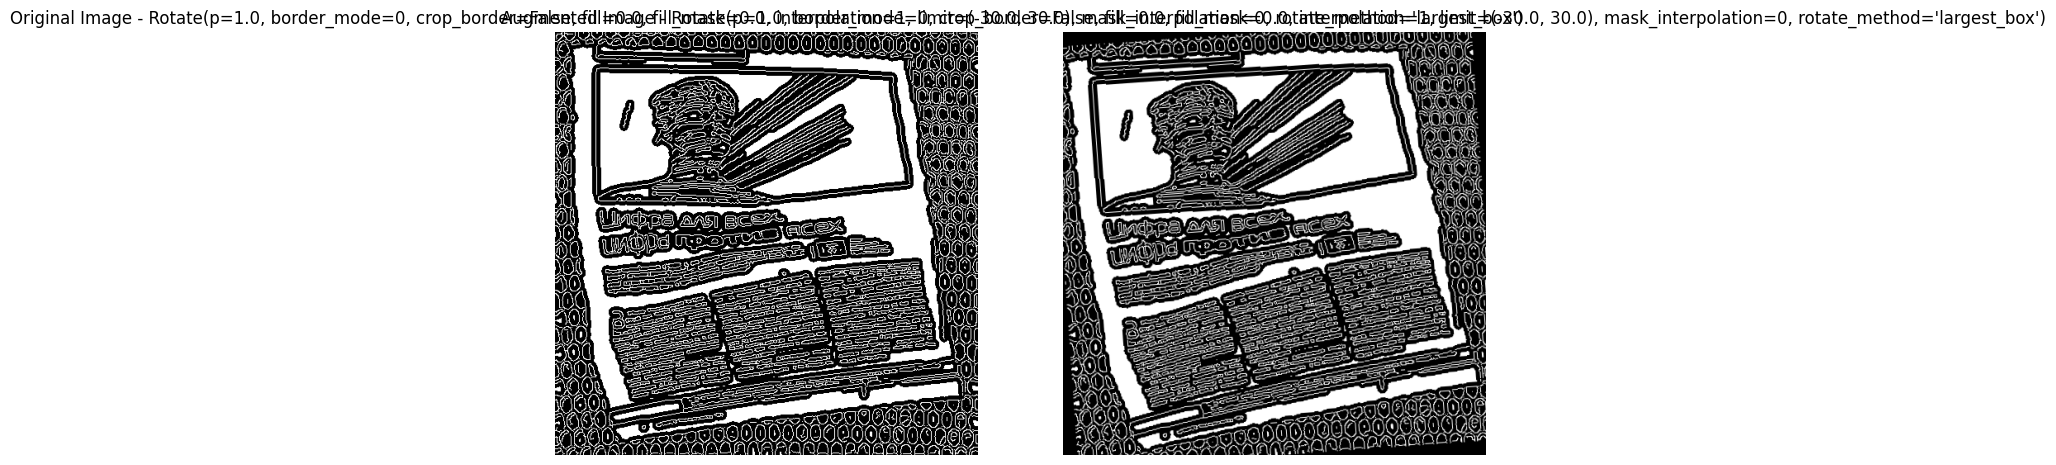

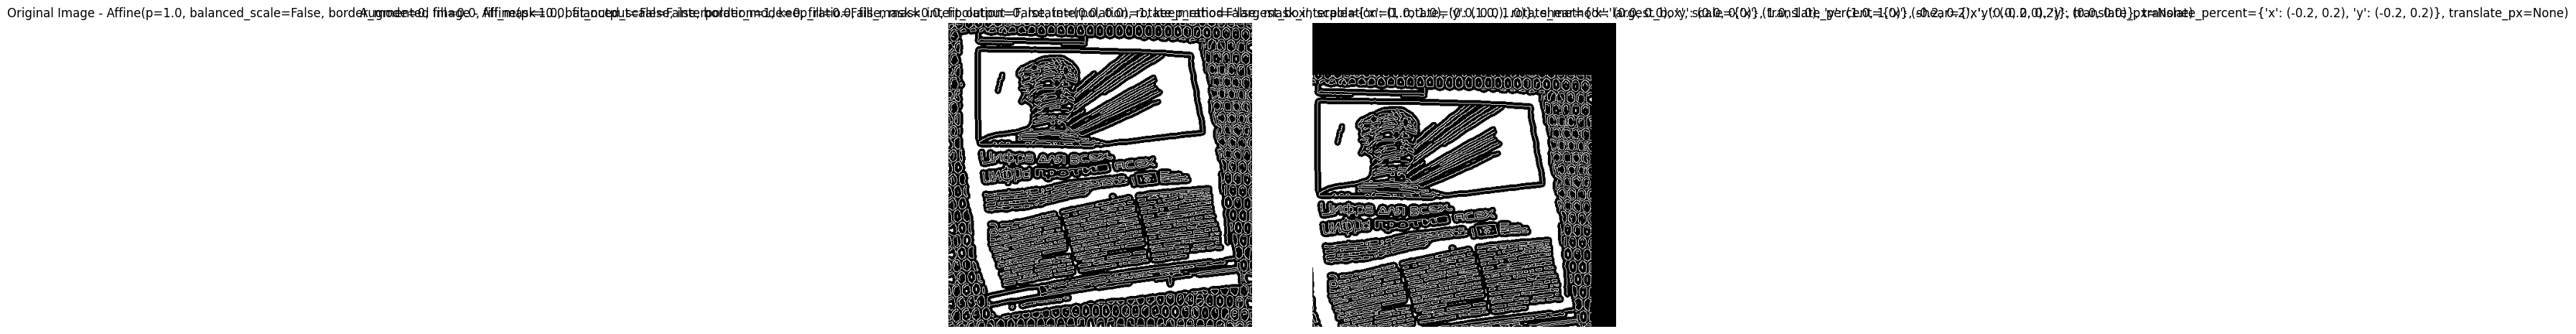

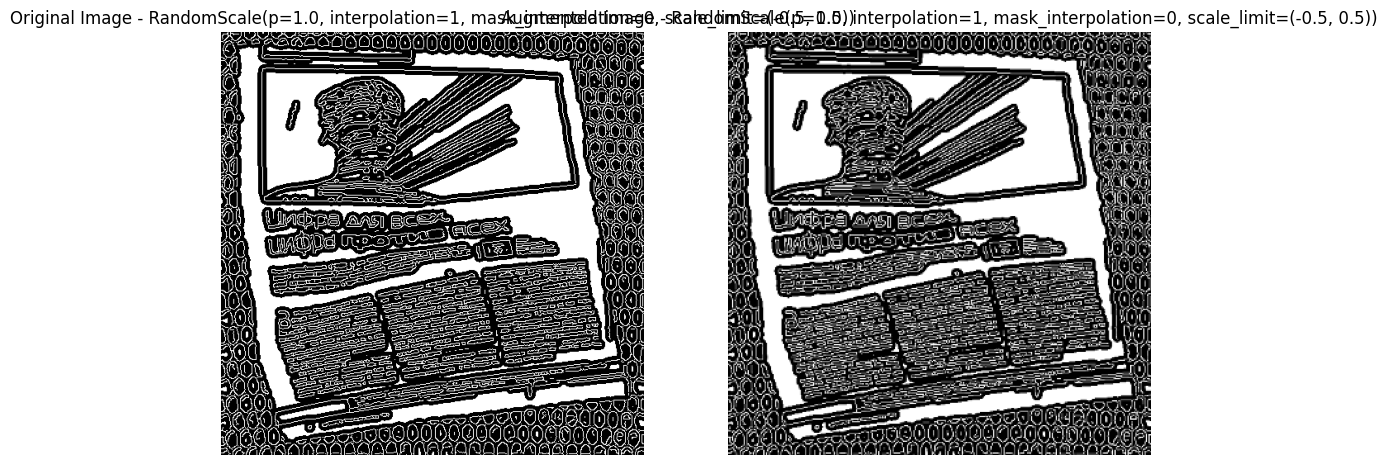

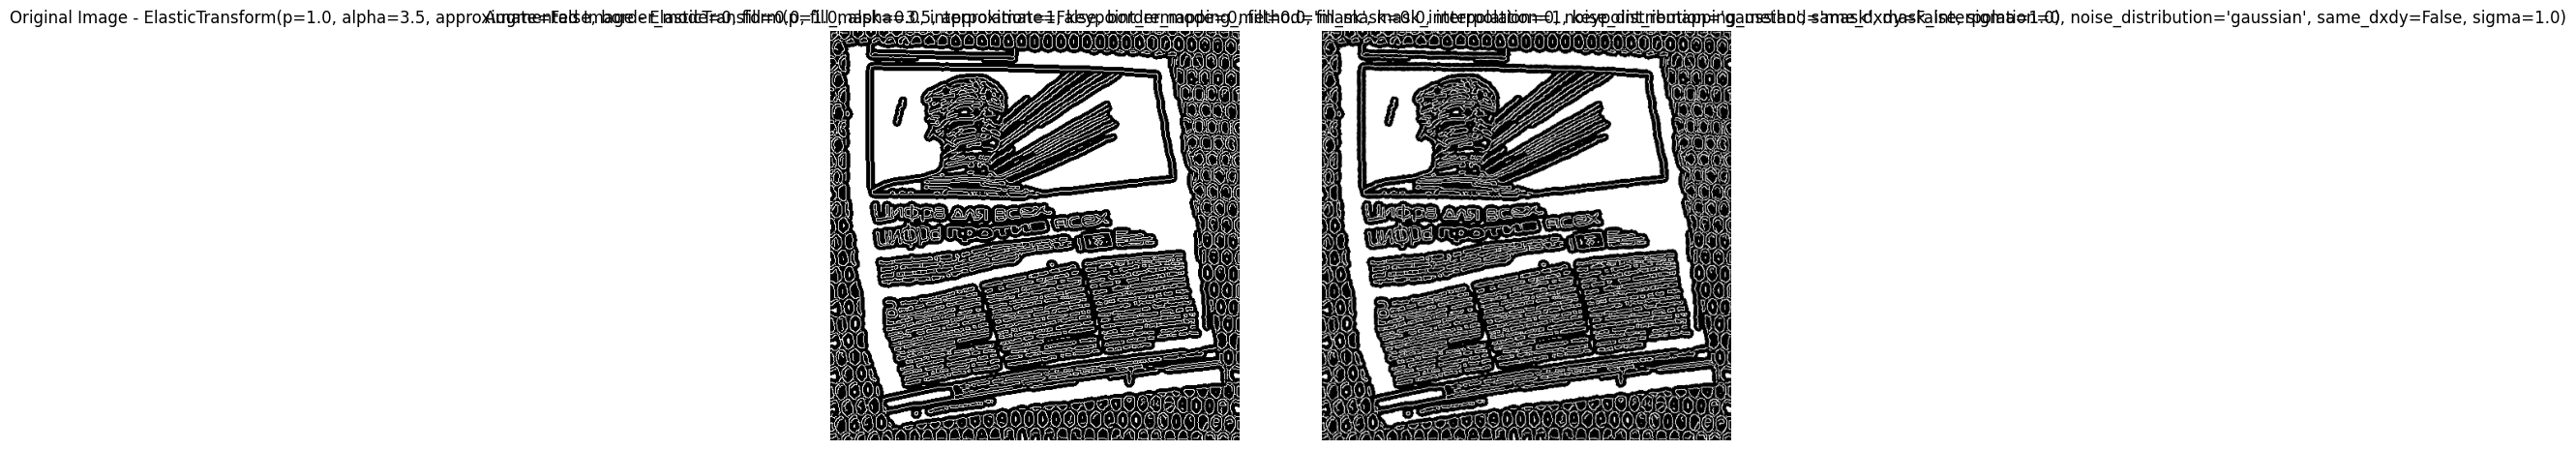

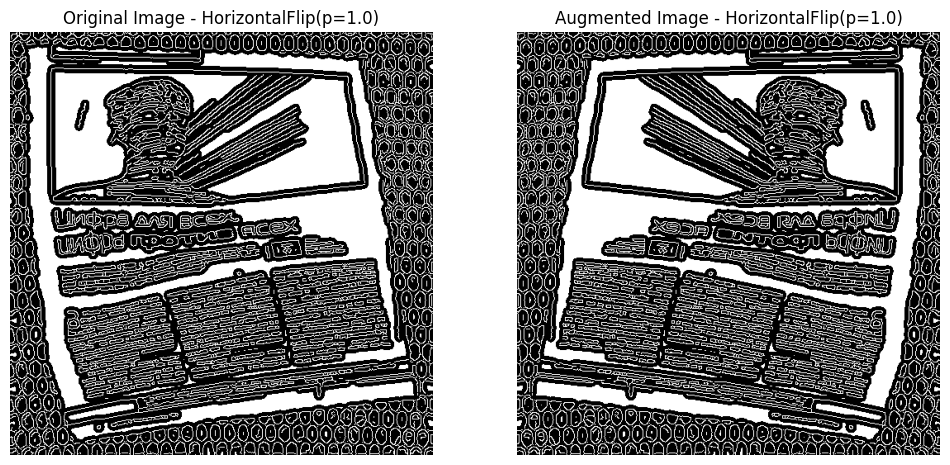

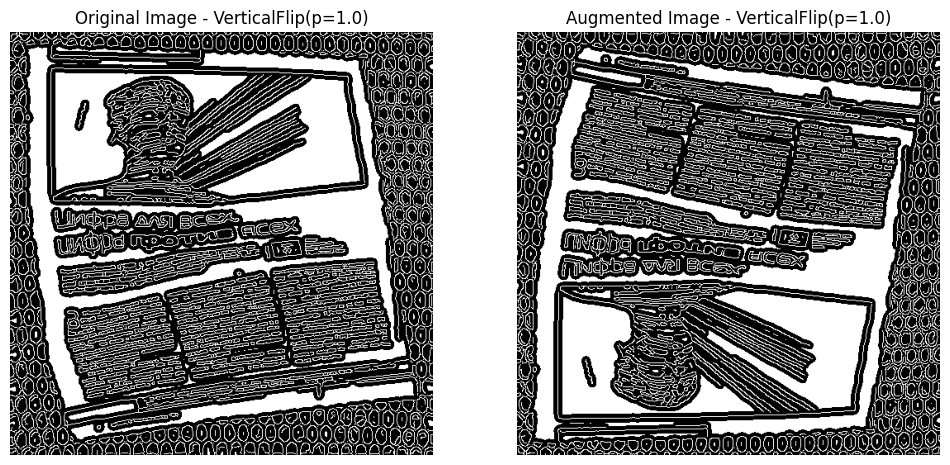

Augmentation results displayed.


In [16]:
# Directories for images and labels
images_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/images'
labels_dir = '/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/labels'

# List of new images and corresponding labels (based on the files you've uploaded)
image_names = ["1-d2a1c88c.png", "1cw-27ac9efc.png", "3-ae558d0b.png", "4-6b70dc80.png", "8-1c1e5c63.png", "10-0798ae97.png"]
label_names = ["1-d2a1c88c.npz", "1cw-27ac9efc.npz", "3-ae558d0b.npz", "4-6b70dc80.npz", "8-1c1e5c63.npz", "10-0798ae97.npz"]

# Augmentation pipeline (one at a time)
augmentations = [
    A.Rotate(limit=30, p=1.0),         
    A.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, p=1.0),  # Translate by a random percentage
    A.RandomScale(scale_limit=0.5, p=1.0),  # Scale by a random factor between 0.5 and 1.5
    A.ElasticTransform(alpha=3.5, sigma=1.0, p=1.0),  # Elastic transformation with sigma >= 1
    A.HorizontalFlip(p=1.0),  # Horizontal flip
    A.VerticalFlip(p=1.0)     # Vertical flip
]

# Load the first image and label as a test example
image_path = Path(images_dir) / image_names[0]
label_path = Path(labels_dir) / label_names[0]

image = cv2.imread(str(image_path))
label = np.load(str(label_path))

# Function to show before and after augmentation
def show_before_after(original_image, augmented_image, augmentation_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show original image
    ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f"Original Image - {augmentation_name}")
    ax[0].axis('off')

    # Show augmented image
    ax[1].imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title(f"Augmented Image - {augmentation_name}")
    ax[1].axis('off')

    plt.show()

# Apply each augmentation and display results
for augment in augmentations:
    transformed = augment(image=image)
    augmented_image = transformed['image']
    show_before_after(image, augmented_image, augmentation_name=str(augment))

print("Augmentation results displayed.")
